# 🇨🇴 ¿Cuáles son las canciones que representan a Colombia? y ¿De qué hablan?

# 🇺🇸 What are the songs that represent Colombia? and what are they talking about?

Segun [este articulo](https://blogs.eltiempo.com/la-escuela-blog/2016/04/20/10-canciones-que-representan-la-diversidad-cultural-en-colombia/) de El Tiempo, **estas son las canciones que representan a Colombia**

* [La Tierra Del Olvido](https://www.youtube.com/watch?v=Vg8LgVOrx6k) (Carlos Vives)
* [La Guaneña](https://www.youtube.com/watch?v=DEFmIsAugMQ) (atribuida a Nicanor Díaz)
* [La cucharita](https://www.youtube.com/watch?v=gXjujYeTttA) (Jorge Velosa y Los Carrangueros de Ráquira)
* [Colombia tierra querida](https://www.youtube.com/watch?v=SNh6ql5QFQw) (Luis Eduardo Bermúdez)
* [El Sanjuanero](https://www.youtube.com/watch?v=z_4wmHtz3Xc) (Anselmo Durán)
* [Ay mi llanura](https://www.youtube.com/watch?v=cAcpEqp7Zaw) (Arnulfo Briceño)
* [Pueblito viejo](https://www.youtube.com/watch?v=PXynEewwZfs) (José A. Morales)
* [La piragua](https://www.youtube.com/watch?v=jQ9Y1uqTrhw) (José Barros)
* [La pollera colorá](https://www.youtube.com/watch?v=6JaWy27lwp8) (Wilson Choperena – Juan Madera)
* [La casa en el aire](https://www.youtube.com/watch?v=6-jm09r3fp4) (Rafael Escalona)

### Veamos
Bueno, lo primero que hice es buscar las letras de las canciones y almacenar cada una en un txt para luego extraer las palabras

In [74]:
import pandas as pd
import os
import numpy as np
 
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
 
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
 
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

In [2]:
def get_file_names_in_path(path):
    """ Devuelve una lista con los nombres de archivos en la ruta [path] """
    filenames = []
    try:
        for raiz, dirs, archivos in os.walk(path):
            for archivo in archivos:
                filenames.append(path+archivo)
        return filenames
    except Exception as e:
        print('Error leyendo los archivo en [{}] Mensaje: {}'.format(path, str(e)))
    return None

In [18]:
def get_data_from_files(files=[]):
    data = ""
    for file_name in files:
        with open(file_name, "r", errors='ignore', encoding='utf-8') as f:
            contents = f.read()
            data = data + " " + contents.replace('\n', ' ').replace('\r', '')
    return data

In [114]:
files = get_file_names_in_path('archivos/')
files.remove('archivos/.DS_Store')

In [115]:
palabras = get_data_from_files(files)
len(palabras)

10965

In [25]:
palabras

" Canta el llanero si tragándose el camino Cual centauro majestuoso Se encuentra con el jilguero Ay mi llanura Embrujo verde donde el azul del cielo Se confunde con tu suelo En la inmensa lejanía En la alborada El sol te besa y del estero al morichal Hienden las garzas el aire Que susurra en las palmeras Un canto de libertad Ay mi llanura Embrujo verde donde el azul del cielo Se confunde con tu suelo En la inmensa lejanía En la alborada El sol te besa y del estero al morichal Hienden las garzas el aire Que susurra en las palmeras Un canto de libertad Ay mi llanura Fina esmeralda es tu cielo cristalino, A tu hermosura Canta el llanero si tragándose el camino Cual centauro majestuoso Se encuentra con el jilguero Ay mi llanura Miles de estrellas velan tus calladas noches Como refulgentes broches En un manto de tersura Tú estás silente Tiernos amantes te confiesan sus amores Se oye de coplas derroches Y entre pasiones ardientes El rocío besa las flores Ay mi llanura Miles de estrellas vela

## Veamos una nube de palabras simple

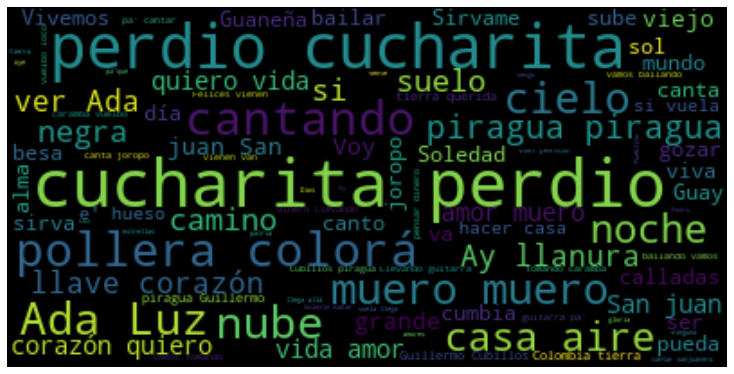

In [116]:
wordcloud = WordCloud(stopwords=stopwords).generate(palabras)
 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Pongamos más cool estas imágenes

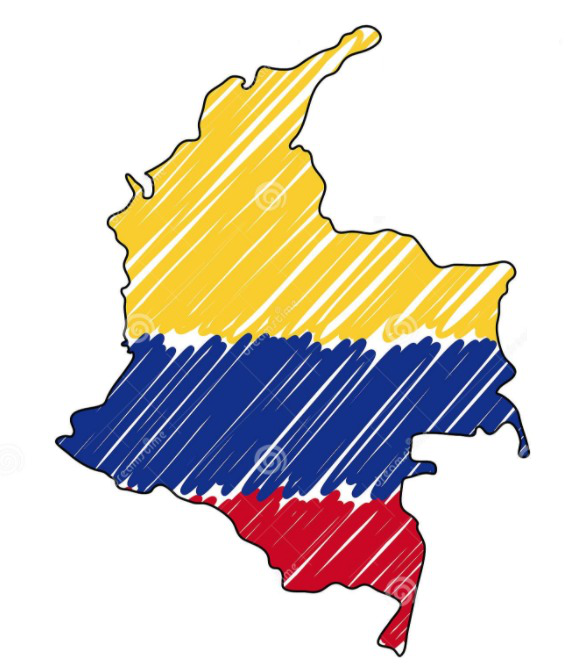

In [104]:
colombia_flag = PIL.Image.open("colombia.jpeg")
display(colombia_flag)

In [118]:
def print_beatiful_cloud(mask_path):
    mask = np.array(Image.open(mask_path))
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", 
                          max_words=1000, mask=mask).generate(palabras)

    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[13,13])
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off");

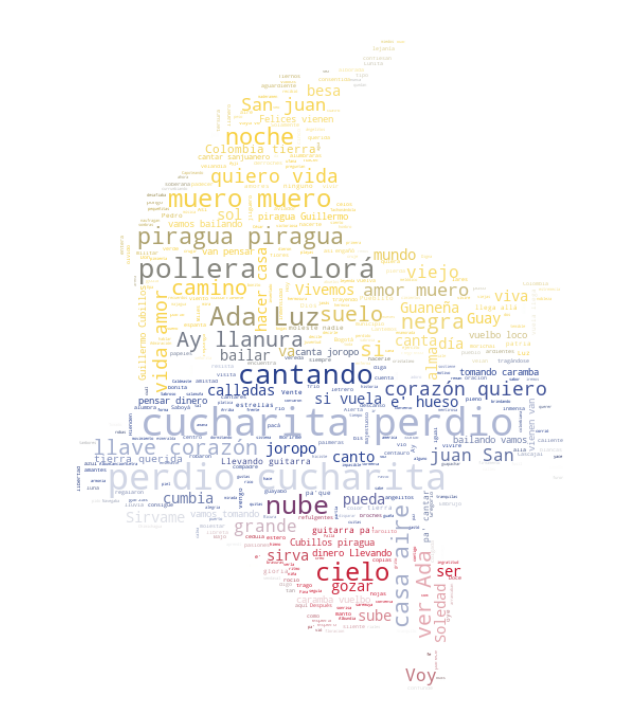

In [119]:
print_beatiful_cloud("colombia.jpeg")

### Ahora, con la bandera de Colombia

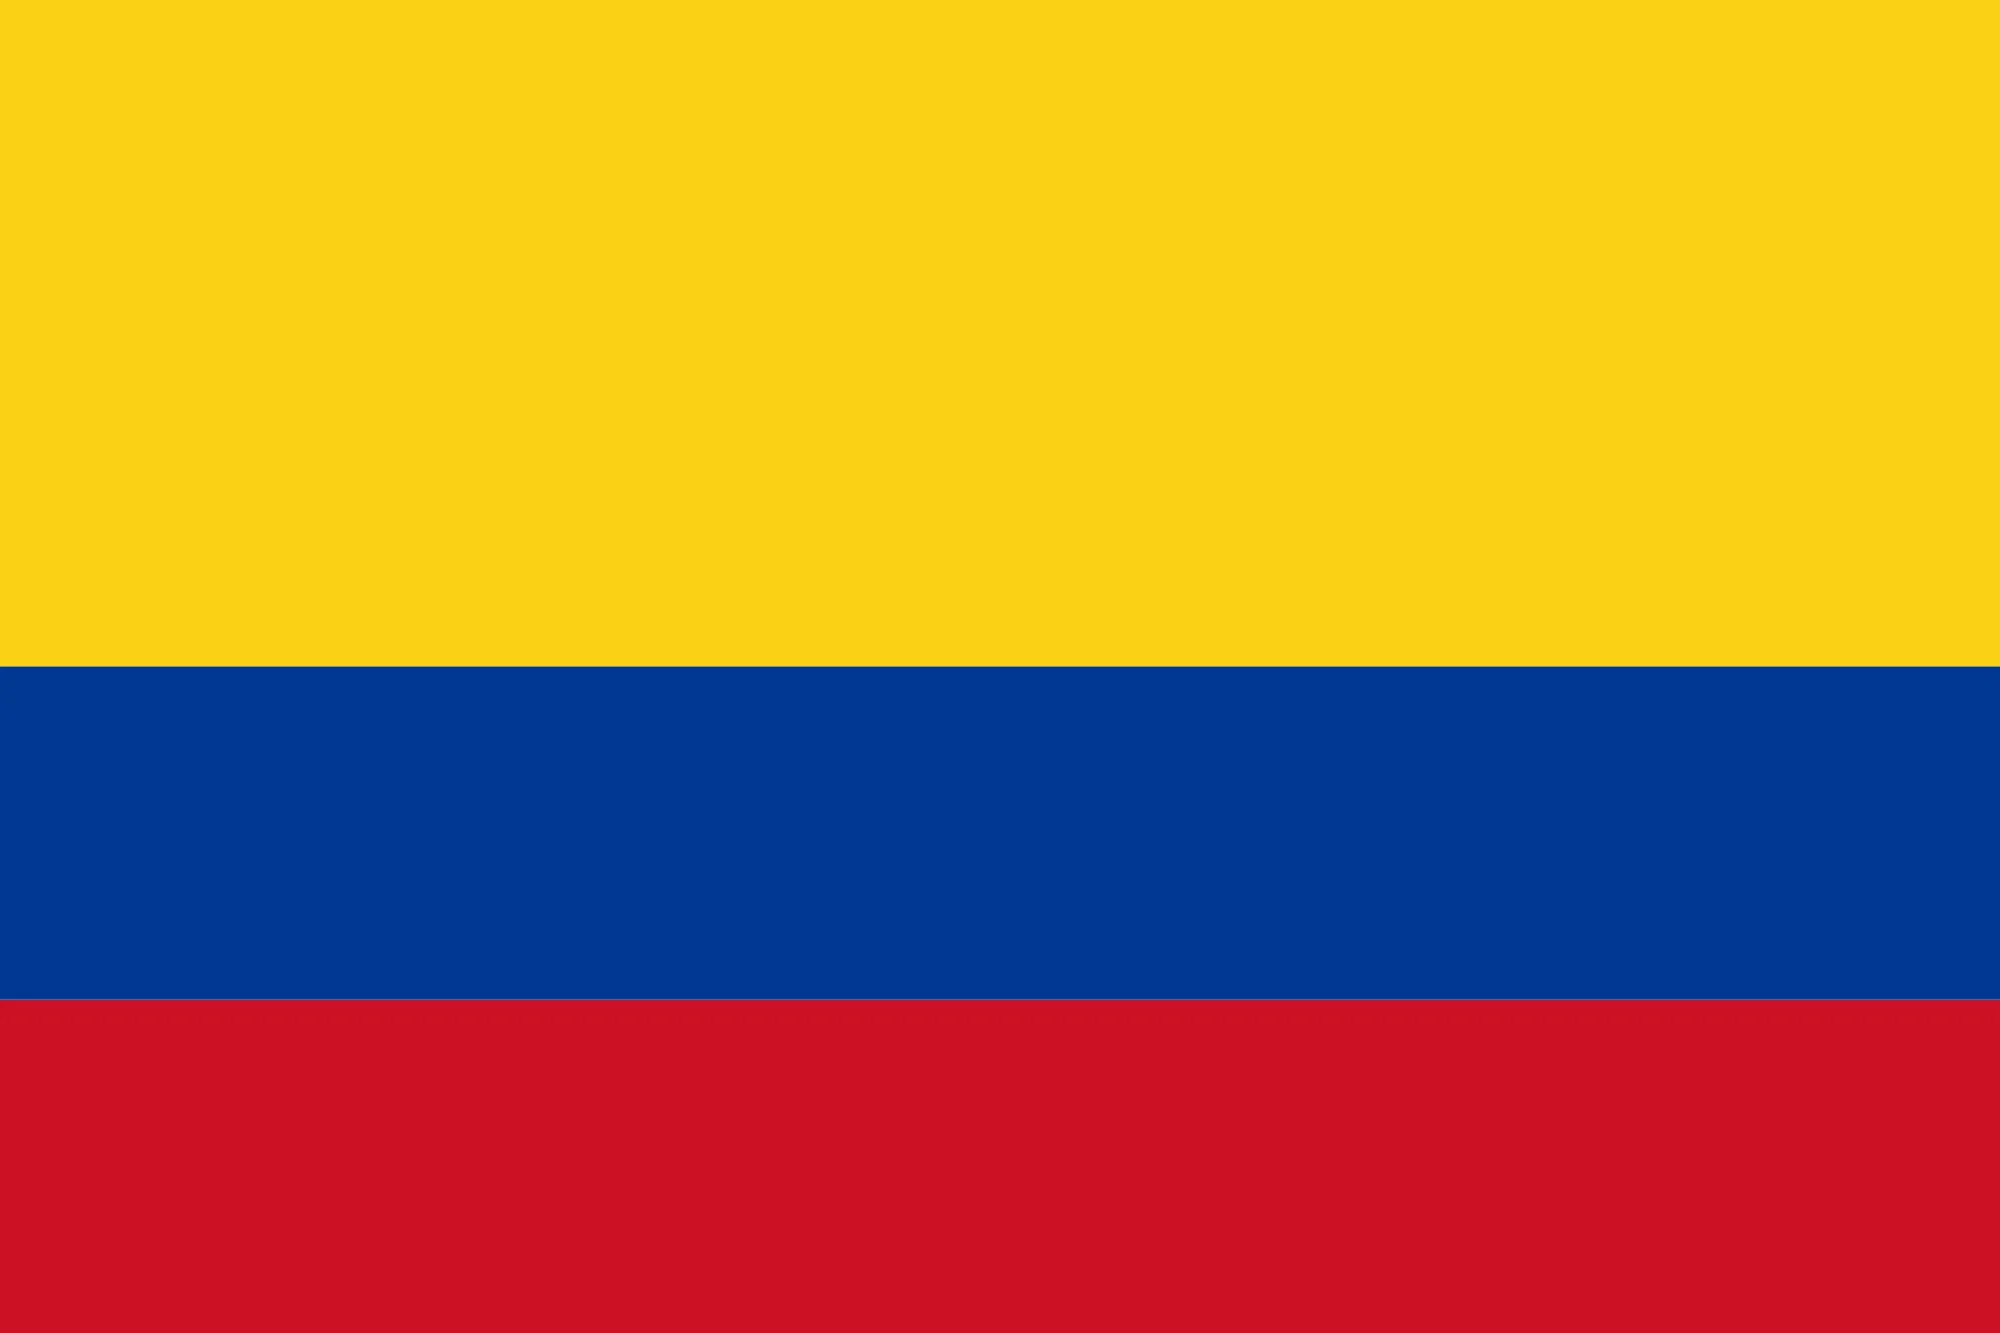

In [110]:
colombia_flag = PIL.Image.open("flag.png")
display(colombia_flag)

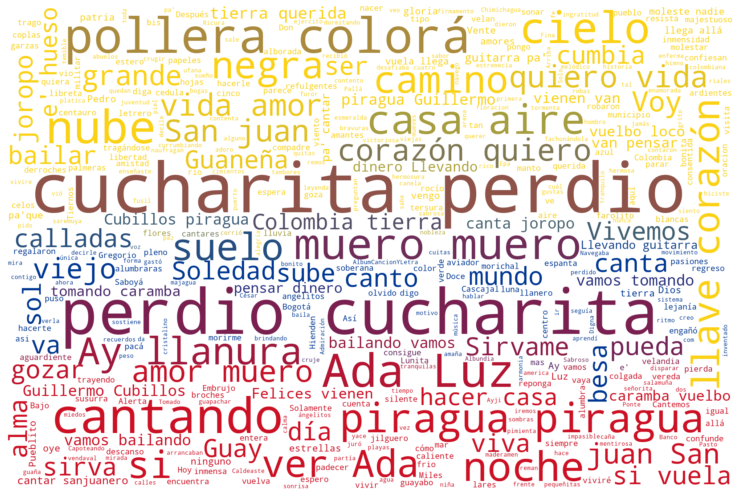

In [120]:
print_beatiful_cloud("flag.png")

### Resumen
Al ser canciones, es normal que se repitan palabras y frases entre los coros. Sin embaego que bueno que resaltan palabras como:
* Canto - Cantando
* Llanura
* Amor
* Luz
* Casa
* Viva
* Gozar
* Corazón
* Cielo
* Felices

🇨🇴 **Nota** Si usted no conoce [Colombia](https://www.colombia.co/), No espere más, venga y conozca [este hermoso país](https://travelgrafia.co/blog/lugares-turisticos-de-colombia/). 

🇺🇸 **Note** If you don't know [Colombia](https://www.colombia.co/en/colombia-travel/), don't wait any longer, come and get to know [this beautiful country](https://www.colombia.co/en/colombia-country/)